<a href="https://colab.research.google.com/github/Ryosuke-sem/TakeHomeExam/blob/main/Ryosuke%2C_Final_project%2C_D%26SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Codes of Final Project

Ryosuke Semba

In [38]:
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
dftrain = pd.read_csv('/content/train_file.csv', index_col=0)

In [41]:
dftrain.head()

,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
IDLink,,,,,,,,,,
Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [42]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [43]:
def preprocess(textdata):
    processedText = []

    wordLemm = WordNetLemmatizer()
    
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [55]:
dftrain.loc[dftrain['SentimentTitle']>=0.400000, "Attention"] = "Higher"
dftrain.loc[(dftrain['SentimentTitle']<0.400000) & (dftrain['SentimentTitle']>=-0.400000), "Attention"] = "Normal"
dftrain.loc[dftrain['SentimentTitle']<-0.400000, "Attention"] = "Lower"

Attention = ["Higher", "Normal", "Lower"]
Attention

['Higher', 'Normal', 'Lower']

In [132]:
H_train = dftrain.loc[dftrain['SentimentTitle']>=0.400000, ["Title", "SentimentTitle"]]
H_train

,Title,SentimentTitle
IDLink,,
nkcazoMD6Y,Why optimism about the US economy's strength h...,0.458333
2Ix9NzQWQQ,BLiNK: The indignity of aid dependency in Pale...,0.553399
Q59Xao6f8b,Microsoft Band 2: The Best Fitness Watch for P...,0.714610
9D7oLHDhW4,An economy friendly and beneficial to all - PM,0.475087
C8DEYKRtmq,Microsoft's Lync Room Systems To Become More L...,0.425000
...,...,...
Ur7ICXiGLp,US economy: Commerce Department's estimate rev...,0.419845
r2nOrap4jn,Obama's Final Task: Don't Veto UN Resolution o...,0.434813
WOKTR33CK8,Xbox One Backward Compatibility: Microsoft add...,0.541667


In [135]:
import nltk
nltk.download('wordnet')
H = preprocess(H_train['Title'])
H

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['why optimism about the u economy strength ha dimmed ',
 'blink the indignity of aid dependency in palestine with unrwa ',
 'microsoft band the best fitness watch for people who really like to sweat ',
 'an economy friendly and beneficial to all pm ',
 'microsoft lync room system to become more like skype ',
 'rba may take heart from improving economic data ',
 'china will hold global economy back in 2016 ',
 'china will hold global economy back in 2016 ',
 'china will hold global economy back in 2016 ',
 'china will hold global economy back in 2016 ',
 'alibaba top single day sale record despite slowing china ',
 'airline seek sweet spot in premium economy distinction ',
 'help wanted obama tech training project now accepting ',
 'reserve bank cautious but optimistic on economy ',
 'german business optimism up on strong domestic economy ',
 'improving economy cause for optimism ',
 'dalal street timid to pay commission award weighs cost to economy ',
 'happy medium tackling premium e

In [143]:
H_word = str(H).split()
H_word

["['why",
 'optimism',
 'about',
 'the',
 'u',
 'economy',
 'strength',
 'ha',
 'dimmed',
 "',",
 "'blink",
 'the',
 'indignity',
 'of',
 'aid',
 'dependency',
 'in',
 'palestine',
 'with',
 'unrwa',
 "',",
 "'microsoft",
 'band',
 'the',
 'best',
 'fitness',
 'watch',
 'for',
 'people',
 'who',
 'really',
 'like',
 'to',
 'sweat',
 "',",
 "'an",
 'economy',
 'friendly',
 'and',
 'beneficial',
 'to',
 'all',
 'pm',
 "',",
 "'microsoft",
 'lync',
 'room',
 'system',
 'to',
 'become',
 'more',
 'like',
 'skype',
 "',",
 "'rba",
 'may',
 'take',
 'heart',
 'from',
 'improving',
 'economic',
 'data',
 "',",
 "'china",
 'will',
 'hold',
 'global',
 'economy',
 'back',
 'in',
 '2016',
 "',",
 "'china",
 'will',
 'hold',
 'global',
 'economy',
 'back',
 'in',
 '2016',
 "',",
 "'china",
 'will',
 'hold',
 'global',
 'economy',
 'back',
 'in',
 '2016',
 "',",
 "'china",
 'will',
 'hold',
 'global',
 'economy',
 'back',
 'in',
 '2016',
 "',",
 "'alibaba",
 'top',
 'single',
 'day',
 'sale',
 're

In [144]:
import collections

c = collections.Counter(H_word)
c

Counter({"',": 341,
         "'12": 1,
         "'2016": 1,
         "'73": 1,
         "']": 1,
         "'adib": 1,
         "'airline": 1,
         "'alcatel": 1,
         "'alibaba": 1,
         "'an": 1,
         "'arkansas": 1,
         "'beware": 1,
         "'bill": 1,
         "'blink": 1,
         "'bok": 1,
         "'boom": 1,
         "'booming": 1,
         "'boston": 1,
         "'bulgaria": 1,
         "'call": 1,
         "'can": 1,
         "'cautious": 1,
         "'center": 1,
         "'china": 19,
         "'clean": 1,
         "'clinton": 2,
         "'confidence": 1,
         "'congress": 1,
         "'consumer": 2,
         "'corruption": 1,
         "'cortana": 1,
         "'dalal": 1,
         "'dear": 2,
         "'decision": 1,
         "'democrat": 1,
         "'denying": 1,
         "'dubai": 1,
         "'economist": 5,
         "'economy": 4,
         "'employment": 1,
         "'energy": 1,
         "'europe": 1,
         "'evidence": 3,
         "'exp

In [147]:
count_df = pd.DataFrame(c.most_common(30), columns = ["words", "frequency"])
count_df

,words,frequency
0,"',",341
1,court,127
2,'obama,122
3,supreme,117
4,to,108
5,economy,96
6,obama,61
7,on,58
8,about,51
9,the,51


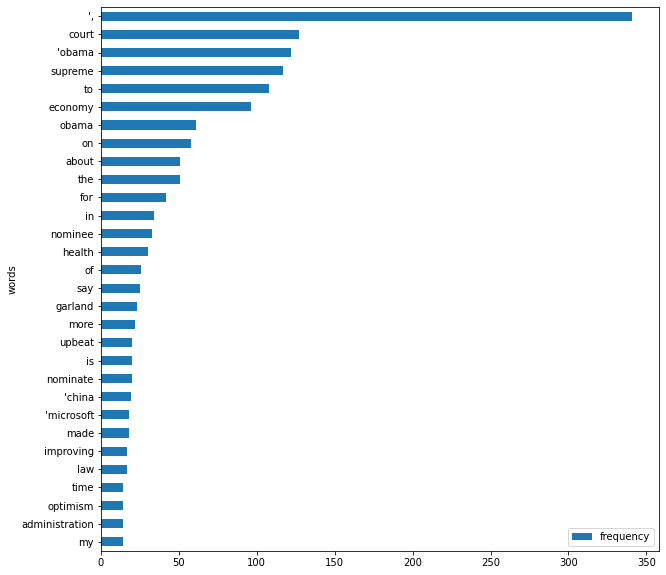

In [148]:
count_df = count_df.set_index("words")
count_df = count_df.sort_values(by="frequency")
count_df.plot.barh(y="frequency", figsize=(10,10))

In [152]:
H_train2 = dftrain.loc[dftrain['SentimentHeadline']>=0.400000, ["Headline", "SentimentHeadline"]]
H_train2
H2 = preprocess(H_train2['Headline'])
H2_word = str(H2).split()
c2 = collections.Counter(H2_word)
count_df2 = pd.DataFrame(c2.most_common(50), columns = ["words", "frequency"])
#to find clearer structure of used words, decide to expand the number of words picked up.
count_df2

,words,frequency
0,the,286
1,"',",185
2,to,152
3,and,129
4,of,112
5,in,96
6,on,74
7,obama,74
8,for,71
9,it,66


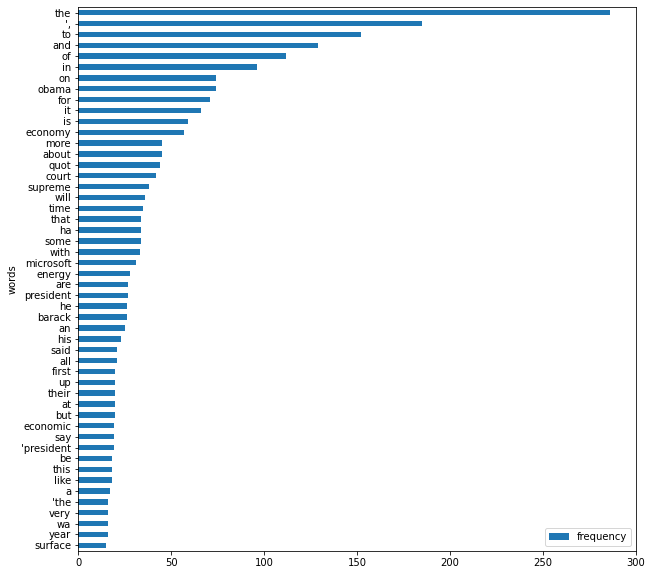

In [153]:
count_df2 = count_df2.set_index("words")
count_df2 = count_df2.sort_values(by="frequency")
count_df2.plot.barh(y="frequency", figsize=(10,10))